In [2]:
#Import Dependencies 
import pandas as pd 
import requests 
import time 
import matplotlib.pyplot as plt 
import numpy as np
from citipy import citipy
import json
from pprint import pprint 
import time
import seaborn as sns


#Import API key
from config import api_key

#Set latitude and longitude Range 
lat_range = (-90, 90)
long_range = (-180, 180)

In [3]:
# Create Empty lists for holding the randomly selected cities and their latitude and longitude 
lat_long = []
cities = []

# Find a set of random lat and long combos
latitudes = np.random.uniform(low=-90.000, high=90.000, size=2500)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=2500)
lat_long = zip(latitudes, longitudes)

#Match the nearest City to the Lat and Long combos
for lat_long in lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    
    #if the city is unique, append to the cities list
    if city not in cities:
        cities.append(city)
        

# Print the number of cities 
len(cities)

846

In [4]:
#query_url + cities[0]
#f"{query_url}{city}"

In [5]:
# Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f'{url}appid={api_key}&units={units}&q='
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=


In [6]:
#Create an empyty list to collect the city data needed for scatter plots
city_data= []
record_count = 1
set_count = 1


#Loop through cities in the city list and append data to lists 
for i, city in enumerate(cities): 
    # Try to grab the data for the empty lists if they are available for each city
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count= 1
        
    #Create URL for each city and json response
    city_url = f"{query_url}{city}"
    response = requests.get(city_url).json()
    
    
    #Include a print log of each city as it's being processed with the city number and city name.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    print(query_url)
    
    
    #Add one to record count
    record_count +=1
    
    try: 
        
        city_name = response["name"]
        temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness= response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        lat = response["coord"]["lat"]
        long = response["coord"]["lon"]
        country = response["sys"]["country"]
        date = response["dt"]
        
        #Append Data to the empty list 
        city_data.append({"City": city_name,
                      "Max_Temp": temp,
                      "Humidity": humidity,
                      "Cloudiness": cloudiness,
                      "Wind_Speed": wind_speed,
                      "Latitude": lat,
                      "Longitude" : long,
                      "Country": country,
                      "Date": date})
            
        
        
    # Create exception if city not found 
    except:
        print("City not found. Skipping to next city...")


Processing Record 1 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 2 of Set 1 | namatanai
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 3 of Set 1 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 4 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 5 of Set 1 | cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 6 of Set 1 | barbar
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
City not found. Skipping to next city...
Processing Record 7 of Set 1 | kodiak
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record 8 of Set 2 | waipawa
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 9 of Set 2 | kumluca
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 10 of Set 2 | kapit
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 11 of Set 2 | grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
City not found. Skipping to next city...
Processing Record 12 of Set 2 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 13 of Set 2 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 14 of Set 2 | port alfred
http://api.openweathermap.org/data

Processing Record 13 of Set 3 | taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
City not found. Skipping to next city...
Processing Record 14 of Set 3 | bocana de paiwas
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 15 of Set 3 | touros
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 16 of Set 3 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 17 of Set 3 | natal
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 18 of Set 3 | praxedis guerrero
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 19 of Set 3 | danes
http://api.openweathermap.org/data

Processing Record 20 of Set 4 | barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
City not found. Skipping to next city...
Processing Record 21 of Set 4 | san lawrenz
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 22 of Set 4 | leh
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 23 of Set 4 | inuvik
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 24 of Set 4 | samusu
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
City not found. Skipping to next city...
Processing Record 25 of Set 4 | san quintin
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 26 of Set 4 | cashel
http://ap

Processing Record 24 of Set 5 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 25 of Set 5 | camocim
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 26 of Set 5 | novobirilyussy
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 27 of Set 5 | lasa
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 28 of Set 5 | ola
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 29 of Set 5 | axim
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 30 of Set 5 | matagami
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperi

Processing Record 29 of Set 6 | dargaville
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 30 of Set 6 | ponta delgada
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 31 of Set 6 | santiago del estero
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 32 of Set 6 | svetlaya
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 33 of Set 6 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 34 of Set 6 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 35 of Set 6 | fort nelson
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4

Processing Record 34 of Set 7 | naples
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 35 of Set 7 | necochea
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 36 of Set 7 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 37 of Set 7 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 38 of Set 7 | sampang
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 39 of Set 7 | seoul
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 40 of Set 7 | sao joao do piaui
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24

Processing Record 39 of Set 8 | rafai
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 40 of Set 8 | kushima
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 41 of Set 8 | rungata
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
City not found. Skipping to next city...
Processing Record 42 of Set 8 | vila velha
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 43 of Set 8 | axixa do tocantins
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
City not found. Skipping to next city...
Processing Record 44 of Set 8 | le port
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 45 of Set 8 | tianpeng
h

Processing Record 44 of Set 9 | kurmanayevka
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 45 of Set 9 | san carlos de bariloche
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 46 of Set 9 | camargo
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 47 of Set 9 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 48 of Set 9 | sheltozero
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 49 of Set 9 | santa cruz
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 50 of Set 9 | tambo
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f

Processing Record 49 of Set 10 | buin
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 50 of Set 10 | bull savanna
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 1 of Set 11 | phrai bung
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
City not found. Skipping to next city...
Processing Record 2 of Set 11 | mataram
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 3 of Set 11 | male
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 4 of Set 11 | shache
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 5 of Set 11 | trinidad
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 6 of Set 12 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 7 of Set 12 | kupang
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 8 of Set 12 | juba
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 9 of Set 12 | alotau
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
City not found. Skipping to next city...
Processing Record 10 of Set 12 | chastoozerye
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
City not found. Skipping to next city...
Processing Record 11 of Set 12 | visnes
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 12 of Set 12 | cairns
http://api.o

Processing Record 12 of Set 13 | atherton
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 13 of Set 13 | billings
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 14 of Set 13 | corning
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 15 of Set 13 | ocampo
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 16 of Set 13 | pietarsaari
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 17 of Set 13 | nosy varika
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 18 of Set 13 | sharlyk
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6

Processing Record 17 of Set 14 | hami
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 18 of Set 14 | coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 19 of Set 14 | moron
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 20 of Set 14 | buerarema
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 21 of Set 14 | lokosovo
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 22 of Set 14 | chokwe
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 23 of Set 14 | upanema
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units

Processing Record 23 of Set 15 | fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 24 of Set 15 | bajil
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 25 of Set 15 | avera
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 26 of Set 15 | tlahualilo
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
City not found. Skipping to next city...
Processing Record 27 of Set 15 | nedjo
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 28 of Set 15 | kasongo-lunda
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 29 of Set 15 | sibu
http://api.openweathermap.org/data/2.5/w

Processing Record 28 of Set 16 | robertson
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 29 of Set 16 | george town
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 30 of Set 16 | sovetskiy
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 31 of Set 16 | benguela
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 32 of Set 16 | badou
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 33 of Set 16 | bowen
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 34 of Set 16 | adilcevaz
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6ea

Processing Record 34 of Set 17 | leshukonskoye
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 35 of Set 17 | salmas
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 36 of Set 17 | tres lagoas
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 37 of Set 17 | along
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 38 of Set 17 | andros town
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 39 of Set 17 | moranbah
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995931d6eab24&units=imperial&q=
Processing Record 40 of Set 17 | boa vista
http://api.openweathermap.org/data/2.5/weather?appid=58e9c876b6f4a758012995

In [7]:
#Reformat Data
#city_data_df["Latitude"]=city_data_df["Latitude"].apply("{:.2f}".format)
#city_data_df["Longitude"]=city_data_df["Longitude"].apply("{:.2f}".format)
#city_data_df["Max_Temp"]=city_data_df["Max_Temp"].apply("{:.2f}".format)
#city_data_df["Wind_Speed"]=

city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Max_Temp,Humidity,Cloudiness,Wind_Speed,Latitude,Longitude,Country,Date
0,Punta Arenas,42.80,70,75,13.87,-53.15,-70.92,CL,1604990927
1,Namatanai,82.98,74,77,4.83,-3.67,152.43,PG,1604990999
2,Carnarvon,75.20,47,0,18.34,-24.87,113.63,AU,1604990999
3,Busselton,62.01,48,28,5.99,-33.65,115.33,AU,1604990723
4,Cherskiy,1.60,94,100,4.00,68.75,161.30,RU,1604990826


In [8]:
#Export the dataframe to a .csv file 
city_data_df.to_csv("Output/city_weather.csv", index=False, header=True)

# Temperature (F) vs. Latitude Scatter Plot
This scatter plot shows the relationship of temperature (F) and latitude. As shown in the scatter plot. The temperature increases as you get coser to the equator. 

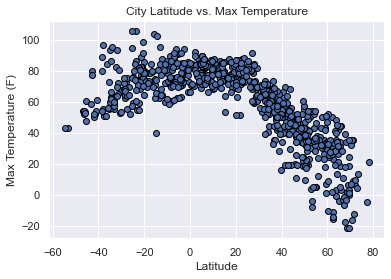

In [10]:
#Create a scatter plot that shows the relationship of temp. vs. lat.
plt.scatter(city_data_df["Latitude"], city_data_df["Max_Temp"], marker = 'o', edgecolor = "black", label="Cities")
plt.title('City Latitude vs. Max Temperature')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
sns.set()
plt.savefig("LatvMaxtemp.png")
plt.show()

# Latitude vs. Cloudiness 
This plot shows the relationship of latitude vs. cloudiness for each city. As shown in the scatter plot, there does not appear to be a clear relationship between cloudiness and latitude.

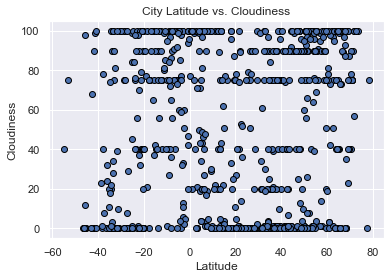

In [11]:
#Create a scatter plot that shows the relationship of humidity vs. lat.
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness"], marker = 'o', edgecolor = "black", label="Cities")
plt.title('City Latitude vs. Cloudiness')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
sns.set()
plt.savefig("LatvCloudiness.png")
plt.show()

# Latitude vs. Humidity 
This plot shows the relationship of latitude vs. humidity for each city. As shown in the scatter plot, the correlation between humidity and latitude is weak.

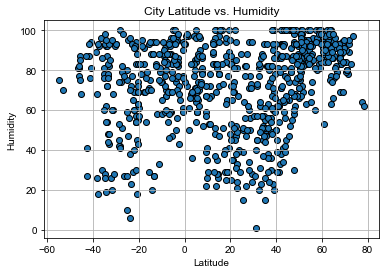

In [9]:
#Create a scatter plot that shows the relationship of humidity vs. lat.
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"], marker = 'o', edgecolor = "black", label="Cities")
plt.title('City Latitude vs. Humidity')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
sns.set()
plt.savefig("LatvHumidity.png")
plt.show()

# Latitude vs. Wind Speed
This scatter plot shows the relationship of Latitude and Windspeed. As shown in the scatter plot, it appears that winds tends to be stronger further away from the equater. 

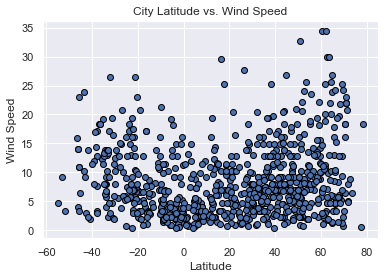

In [35]:
#Create a scatter plot that shows the relationship of humidity vs. lat.
plt.scatter(city_data_df["Latitude"], city_data_df["Wind_Speed"], marker = 'o', edgecolor = "black", label="Cities")
plt.title('City Latitude vs. Wind Speed')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
sns.set()
plt.savefig("LatvWindSpeed.png")
plt.show()